In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from sklearn.ensemble import IsolationForest

mpl.rcParams['figure.figsize'] = (15, 8)
mpl.rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/All_months.csv')
df

MeterID            DATE-Time    KWH
0          6200093839  2021-01-01 00:00:00  0.602
1          6200093839  2021-01-01 00:15:00  0.589
2          6200093839  2021-01-01 00:30:00  0.410
3          6200093839  2021-01-01 00:45:00  0.495
4          6200093839  2021-01-01 01:00:00  0.450
...               ...                  ...    ...
287339225  6200060529  2021-12-31 22:45:00  0.038
287339226  6200060529  2021-12-31 23:00:00  0.049
287339227  6200060529  2021-12-31 23:15:00  0.024
287339228  6200060529  2021-12-31 23:30:00  0.045
287339229  6200060529  2021-12-31 23:45:00  0.039

[287339230 rows x 3 columns]

In [3]:
print(df["MeterID"].unique())
print(len(df["MeterID"].unique()))

[6200093839 6200093048 6200085183 ... 6200101198 6200068147 6200060529]
8535


In [4]:
user_1 = df[df["MeterID"] == df["MeterID"].unique()[0]]
user_1

MeterID            DATE-Time    KWH
0          6200093839  2021-01-01 00:00:00  0.602
1          6200093839  2021-01-01 00:15:00  0.589
2          6200093839  2021-01-01 00:30:00  0.410
3          6200093839  2021-01-01 00:45:00  0.495
4          6200093839  2021-01-01 01:00:00  0.450
...               ...                  ...    ...
262129436  6200093839  2021-12-31 22:45:00  0.405
262129437  6200093839  2021-12-31 23:00:00  0.349
262129438  6200093839  2021-12-31 23:15:00  0.305
262129439  6200093839  2021-12-31 23:30:00  0.398
262129440  6200093839  2021-12-31 23:45:00  0.388

[32760 rows x 3 columns]

In [5]:
user_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32760 entries, 0 to 262129440
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeterID    32760 non-null  int64  
 1   DATE-Time  32760 non-null  object 
 2   KWH        32760 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1023.8+ KB


In [6]:
user_1['DATE-Time'] = pd.to_datetime(user_1['DATE-Time'], infer_datetime_format=True)
user_1.drop(columns="MeterID", inplace=True)
user_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32760 entries, 0 to 262129440
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE-Time  32760 non-null  datetime64[ns]
 1   KWH        32760 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 767.8 KB


In [7]:
user_1  # Should start on (1 Jan 2021 00:00:00) to (31 Dec 2021 23:45:00)

DATE-Time    KWH
0         2021-01-01 00:00:00  0.602
1         2021-01-01 00:15:00  0.589
2         2021-01-01 00:30:00  0.410
3         2021-01-01 00:45:00  0.495
4         2021-01-01 01:00:00  0.450
...                       ...    ...
262129436 2021-12-31 22:45:00  0.405
262129437 2021-12-31 23:00:00  0.349
262129438 2021-12-31 23:15:00  0.305
262129439 2021-12-31 23:30:00  0.398
262129440 2021-12-31 23:45:00  0.388

[32760 rows x 2 columns]

In [ ]:
#Resample to 1H window, ffill missing values
    df = df["P2"].resample("1H").mean().fillna(method="ffill").to_frame()

In [ ]:
user_1.resample("1H")
# user_1_1H = user_1["KWH"].resample("1H").mean().fillna(method="ffill").to_frame()

In [8]:
# Resample to 1H
user_1_1H = user_1.set_index('DATE-Time').resample("H").mean().reset_index()
print(len(user_1_1H))
user_1_1H

8760


DATE-Time      KWH
0    2021-01-01 00:00:00  0.52400
1    2021-01-01 01:00:00  0.45825
2    2021-01-01 02:00:00  0.43250
3    2021-01-01 03:00:00  0.44625
4    2021-01-01 04:00:00  0.45500
...                  ...      ...
8755 2021-12-31 19:00:00  0.41700
8756 2021-12-31 20:00:00  0.39275
8757 2021-12-31 21:00:00  0.40200
8758 2021-12-31 22:00:00  0.40000
8759 2021-12-31 23:00:00  0.36000

[8760 rows x 2 columns]

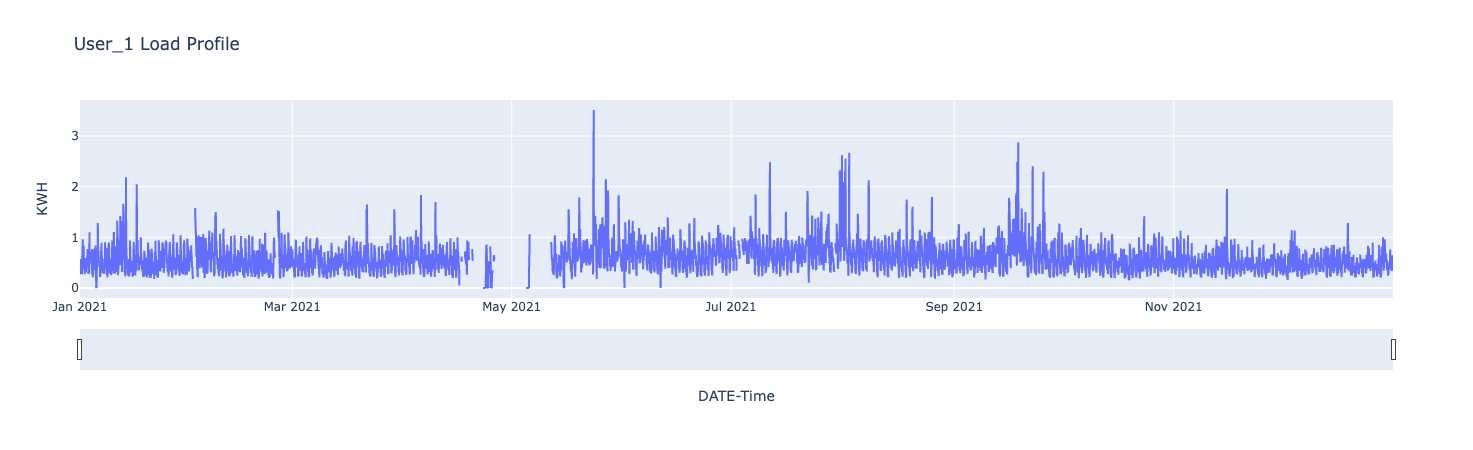

In [9]:
# Examine User_1
fig = px.line(user_1_1H.reset_index(), x='DATE-Time', y='KWH', title='User_1 Load Profile')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [10]:
# Fill missing value
# Resample to 1H
user_1_1H = user_1.set_index('DATE-Time').resample("H").mean().fillna(method="ffill").reset_index()
print(len(user_1_1H))
user_1_1H

8760


DATE-Time      KWH
0    2021-01-01 00:00:00  0.52400
1    2021-01-01 01:00:00  0.45825
2    2021-01-01 02:00:00  0.43250
3    2021-01-01 03:00:00  0.44625
4    2021-01-01 04:00:00  0.45500
...                  ...      ...
8755 2021-12-31 19:00:00  0.41700
8756 2021-12-31 20:00:00  0.39275
8757 2021-12-31 21:00:00  0.40200
8758 2021-12-31 22:00:00  0.40000
8759 2021-12-31 23:00:00  0.36000

[8760 rows x 2 columns]

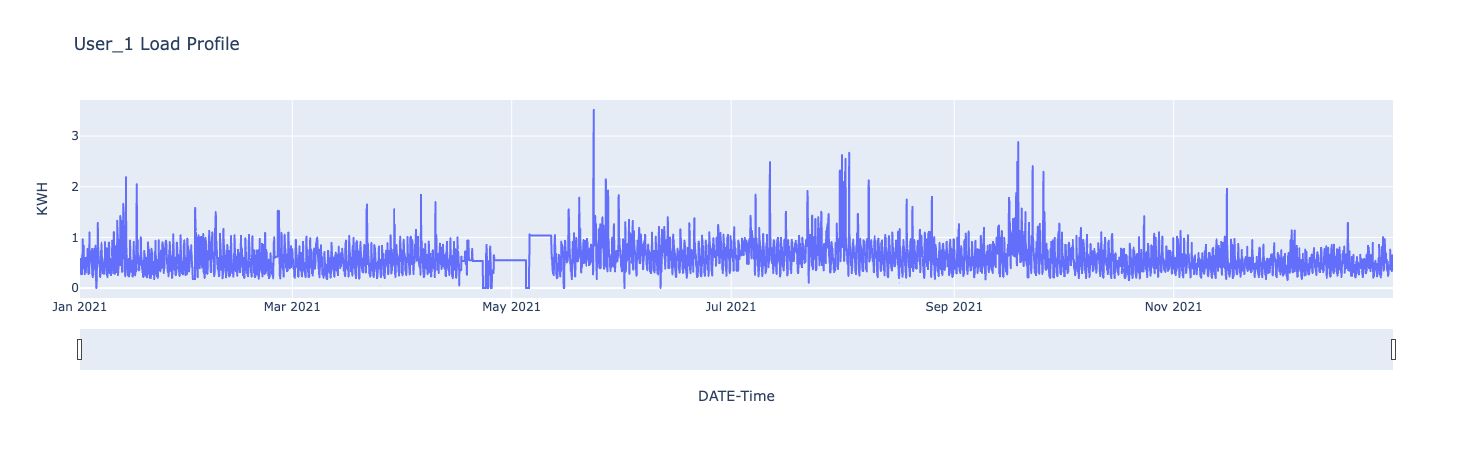

In [11]:
# Examine User_1
fig = px.line(user_1_1H.reset_index(), x='DATE-Time', y='KWH', title='User_1 Load Profile')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [12]:
user_1_1H['hour']=user_1_1H["DATE-Time"].dt.hour

In [13]:
user_1_1H['weekday']=pd.Categorical(user_1_1H["DATE-Time"].dt.strftime('%A'),   # '%A' represents to Weekday as locale’s full name.
                             categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                             ordered=True)

In [14]:
user_1_1H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE-Time  8760 non-null   datetime64[ns]
 1   KWH        8760 non-null   float64       
 2   hour       8760 non-null   int64         
 3   weekday    8760 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 214.3 KB


In [15]:
user_1_1H

DATE-Time      KWH  hour weekday
0    2021-01-01 00:00:00  0.52400     0  Friday
1    2021-01-01 01:00:00  0.45825     1  Friday
2    2021-01-01 02:00:00  0.43250     2  Friday
3    2021-01-01 03:00:00  0.44625     3  Friday
4    2021-01-01 04:00:00  0.45500     4  Friday
...                  ...      ...   ...     ...
8755 2021-12-31 19:00:00  0.41700    19  Friday
8756 2021-12-31 20:00:00  0.39275    20  Friday
8757 2021-12-31 21:00:00  0.40200    21  Friday
8758 2021-12-31 22:00:00  0.40000    22  Friday
8759 2021-12-31 23:00:00  0.36000    23  Friday

[8760 rows x 4 columns]

In [16]:
user_1_1H.isnull().sum()

DATE-Time    0
KWH          0
hour         0
weekday      0
dtype: int64

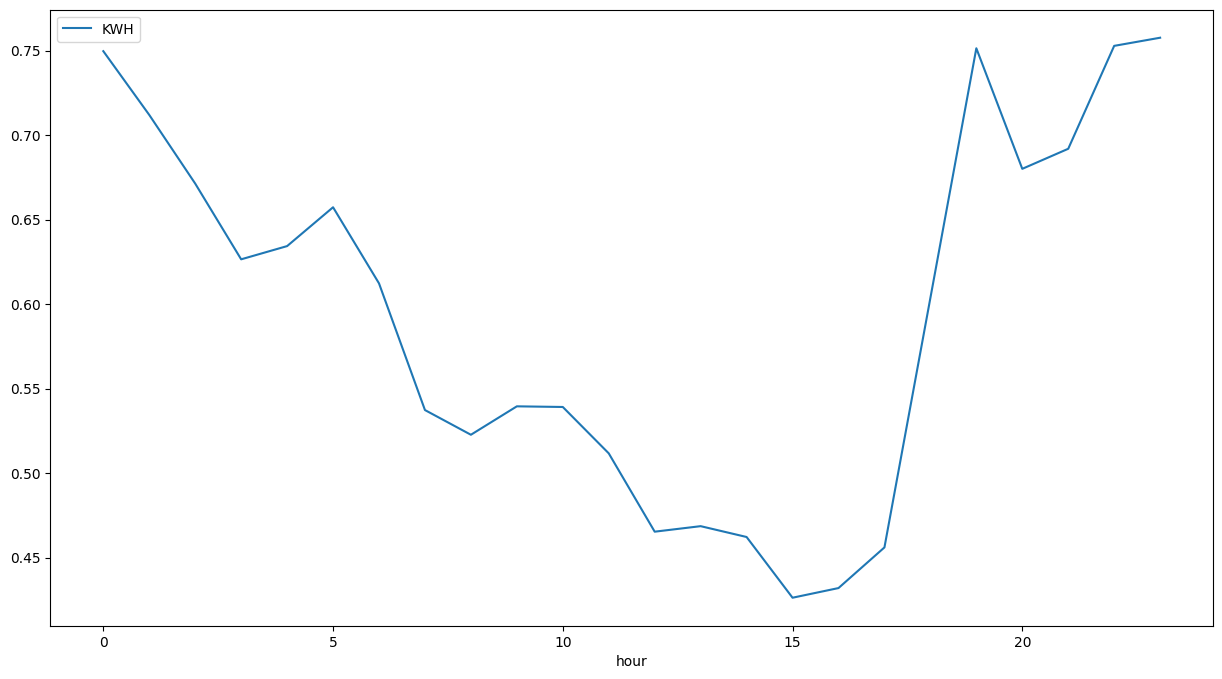

In [17]:
user_1_1H[['KWH','hour']].groupby('hour').mean().plot();

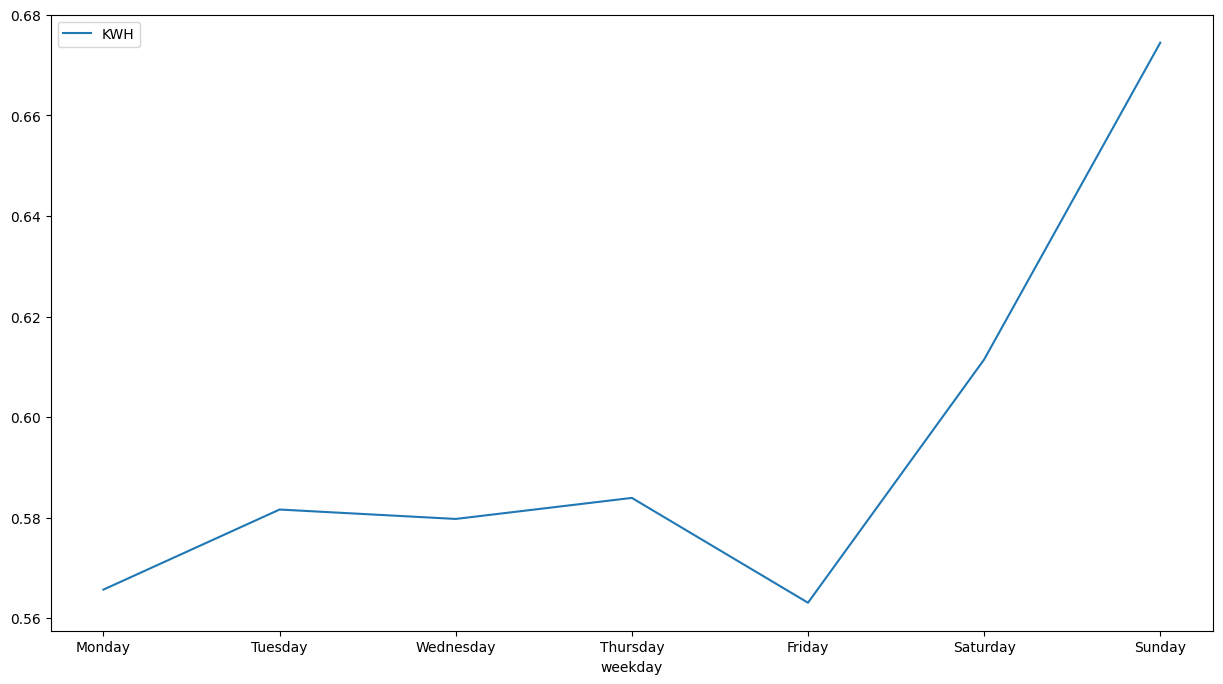

In [18]:
user_1_1H[['KWH','weekday']].groupby('weekday').mean().plot();

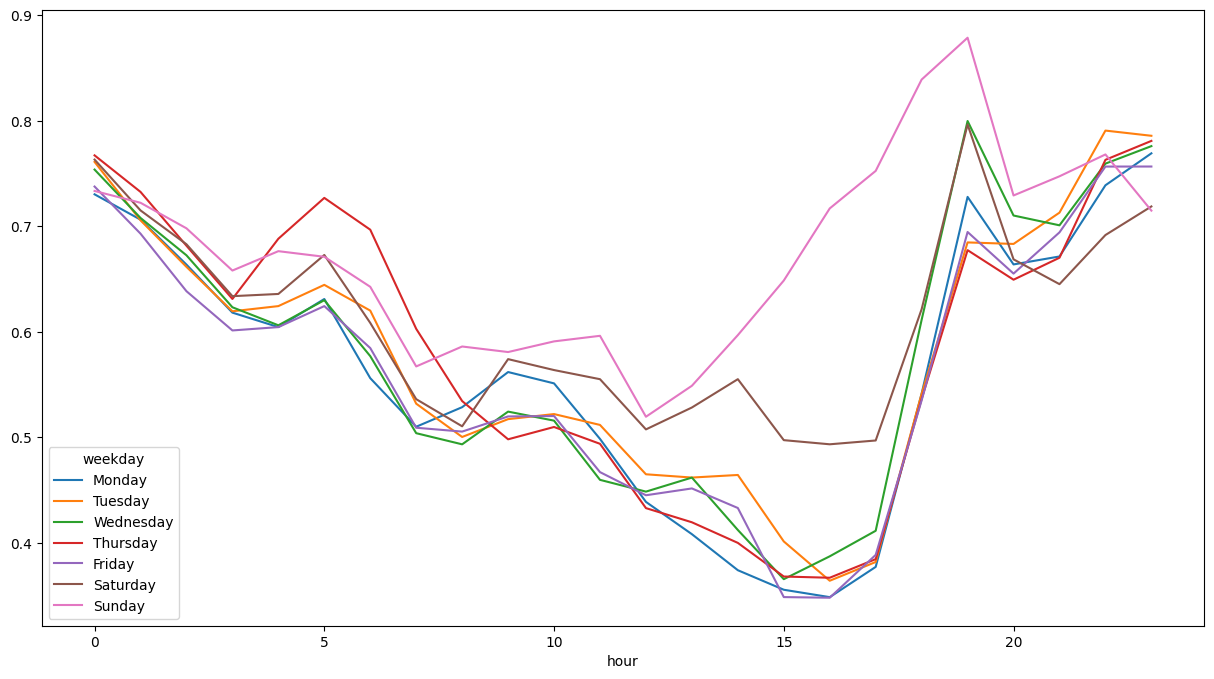

In [19]:
user_1_1H.groupby(['hour', 'weekday']).mean()['KWH'].unstack().plot();

In [20]:
user_1_1H.groupby(['hour', 'weekday'])['KWH'].mean()

hour  weekday  
0     Monday       0.730441
      Tuesday      0.761188
      Wednesday    0.753896
      Thursday     0.767383
      Friday       0.737819
                     ...   
23    Wednesday    0.776149
      Thursday     0.781101
      Friday       0.756802
      Saturday     0.718942
      Sunday       0.714990
Name: KWH, Length: 168, dtype: float64

In [21]:
user_1_1H.join(user_1_1H.groupby(['hour', 'weekday'])['KWH'].mean(), on=['hour','weekday'], rsuffix='_avg')

DATE-Time      KWH  hour weekday   KWH_avg
0    2021-01-01 00:00:00  0.52400     0  Friday  0.737819
1    2021-01-01 01:00:00  0.45825     1  Friday  0.693146
2    2021-01-01 02:00:00  0.43250     2  Friday  0.638575
3    2021-01-01 03:00:00  0.44625     3  Friday  0.601377
4    2021-01-01 04:00:00  0.45500     4  Friday  0.604547
...                  ...      ...   ...     ...       ...
8755 2021-12-31 19:00:00  0.41700    19  Friday  0.694726
8756 2021-12-31 20:00:00  0.39275    20  Friday  0.655274
8757 2021-12-31 21:00:00  0.40200    21  Friday  0.694382
8758 2021-12-31 22:00:00  0.40000    22  Friday  0.756764
8759 2021-12-31 23:00:00  0.36000    23  Friday  0.756802

[8760 rows x 5 columns]

In [22]:
df_final_user_1=user_1_1H.join(user_1_1H.groupby(['hour', 'weekday'])['KWH'].mean(), on=['hour','weekday'], rsuffix='_avg')
df_final_user_1

DATE-Time      KWH  hour weekday   KWH_avg
0    2021-01-01 00:00:00  0.52400     0  Friday  0.737819
1    2021-01-01 01:00:00  0.45825     1  Friday  0.693146
2    2021-01-01 02:00:00  0.43250     2  Friday  0.638575
3    2021-01-01 03:00:00  0.44625     3  Friday  0.601377
4    2021-01-01 04:00:00  0.45500     4  Friday  0.604547
...                  ...      ...   ...     ...       ...
8755 2021-12-31 19:00:00  0.41700    19  Friday  0.694726
8756 2021-12-31 20:00:00  0.39275    20  Friday  0.655274
8757 2021-12-31 21:00:00  0.40200    21  Friday  0.694382
8758 2021-12-31 22:00:00  0.40000    22  Friday  0.756764
8759 2021-12-31 23:00:00  0.36000    23  Friday  0.756802

[8760 rows x 5 columns]

## Anomalous Point

```
NYC Marathon - 2014-11-02
Thanksgiving - 2014-11-27
Christmas - 2014-12-25
New Years - 2015-01-01
Snow Blizzard - 2015-01-26 and 2015-01-27
```

In [23]:
# NYC Marathon
df_final_user_1.set_index('DATE-Time').loc['2021-11-02']

KWH  hour  weekday   KWH_avg
DATE-Time                                            
2021-11-02 00:00:00  0.56100     0  Tuesday  0.761188
2021-11-02 01:00:00  0.50050     1  Tuesday  0.705827
2021-11-02 02:00:00  0.45225     2  Tuesday  0.661654
2021-11-02 03:00:00  0.40475     3  Tuesday  0.619529
2021-11-02 04:00:00  0.77475     4  Tuesday  0.624457
2021-11-02 05:00:00  0.96225     5  Tuesday  0.644601
2021-11-02 06:00:00  0.87275     6  Tuesday  0.620178
2021-11-02 07:00:00  0.82450     7  Tuesday  0.531937
2021-11-02 08:00:00  0.47375     8  Tuesday  0.500370
2021-11-02 09:00:00  0.56950     9  Tuesday  0.517269
2021-11-02 10:00:00  0.53550    10  Tuesday  0.522082
2021-11-02 11:00:00  0.43475    11  Tuesday  0.511784
2021-11-02 12:00:00  0.41975    12  Tuesday  0.464990
2021-11-02 13:00:00  0.47925    13  Tuesday  0.461889
2021-11-02 14:00:00  0.21400    14  Tuesday  0.464337
2021-11-02 15:00:00  0.27450    15  Tuesday  0.401303
2021-11-02 16:00:00  0.28850    16  Tuesday  0.364053
2021-11-02 17:00:00  0.38875    17  Tuesday  0.381817
2021-11-02 18:00:00  0.45100    18  Tuesday  0.541380
2021-11-02 19:00:00  0.50075    19  Tuesday  0.684837
2021-11-02 20:00:00  0.56175    20  Tuesday  0.683404
2021-11-02 21:00:00  1.06100    21  Tuesday  0.713082
2021-11-02 22:00:00  1.12950    22  Tuesday  0.790875
2021-11-02 23:00:00  0.73150    23  Tuesday  0.785952

In [24]:
df_final_user_1['day'] = df_final_user_1["DATE-Time"].dt.weekday
df_final_user_1

DATE-Time      KWH  hour weekday   KWH_avg  day
0    2021-01-01 00:00:00  0.52400     0  Friday  0.737819    4
1    2021-01-01 01:00:00  0.45825     1  Friday  0.693146    4
2    2021-01-01 02:00:00  0.43250     2  Friday  0.638575    4
3    2021-01-01 03:00:00  0.44625     3  Friday  0.601377    4
4    2021-01-01 04:00:00  0.45500     4  Friday  0.604547    4
...                  ...      ...   ...     ...       ...  ...
8755 2021-12-31 19:00:00  0.41700    19  Friday  0.694726    4
8756 2021-12-31 20:00:00  0.39275    20  Friday  0.655274    4
8757 2021-12-31 21:00:00  0.40200    21  Friday  0.694382    4
8758 2021-12-31 22:00:00  0.40000    22  Friday  0.756764    4
8759 2021-12-31 23:00:00  0.36000    23  Friday  0.756802    4

[8760 rows x 6 columns]

In [25]:
data = df_final_user_1[['KWH', 'hour', 'day']]
data

KWH  hour  day
0     0.52400     0    4
1     0.45825     1    4
2     0.43250     2    4
3     0.44625     3    4
4     0.45500     4    4
...       ...   ...  ...
8755  0.41700    19    4
8756  0.39275    20    4
8757  0.40200    21    4
8758  0.40000    22    4
8759  0.36000    23    4

[8760 rows x 3 columns]

# Train Model

In [26]:
model =  IsolationForest(contamination=0.005, max_features=3, max_samples=0.8, n_estimators=200)
model.fit(data)

IsolationForest(contamination=0.005, max_features=3, max_samples=0.8,
                n_estimators=200)

In [27]:
df_final_user_1['outliers']=pd.Series(model.predict(data)).apply(lambda x: 'yes' if (x == -1) else 'no' )

In [28]:
print("The anomaly events: ", len(df_final_user_1.query('outliers=="yes"')))
df_final_user_1.query('outliers=="yes"')

The anomaly events:  44


DATE-Time       KWH  hour    weekday   KWH_avg  day outliers
119  2021-01-05 23:00:00  1.284250    23    Tuesday  0.785952    1      yes
289  2021-01-13 01:00:00  1.663250     1  Wednesday  0.708038    2      yes
307  2021-01-13 19:00:00  2.185000    19  Wednesday  0.799957    2      yes
766  2021-02-01 22:00:00  0.178000    22     Monday  0.739010    0      yes
767  2021-02-01 23:00:00  0.178000    23     Monday  0.769317    0      yes
768  2021-02-02 00:00:00  1.578667     0    Tuesday  0.761188    1      yes
1320 2021-02-25 00:00:00  1.528667     0   Thursday  0.767383    3      yes
2097 2021-03-29 09:00:00  1.555500     9     Monday  0.561933    0      yes
2275 2021-04-05 19:00:00  1.838000    19     Monday  0.728010    0      yes
2688 2021-04-23 00:00:00  0.000000     0     Friday  0.737819    4      yes
2741 2021-04-25 05:00:00  0.000000     5     Sunday  0.671221    6      yes
2976 2021-05-05 00:00:00  0.000000     0  Wednesday  0.753896    2      yes
3425 2021-05-23 17:00:00  2.545750    17     Sunday  0.752644    6      yes
3426 2021-05-23 18:00:00  2.830750    18     Sunday  0.839260    6      yes
3427 2021-05-23 19:00:00  3.515250    19     Sunday  0.878928    6      yes
3508 2021-05-27 04:00:00  2.145250     4   Thursday  0.688317    3      yes
3509 2021-05-27 05:00:00  2.088500     5   Thursday  0.727058    3      yes
3523 2021-05-27 19:00:00  1.924750    19   Thursday  0.677505    3      yes
4603 2021-07-11 19:00:00  2.481500    19     Sunday  0.878928    6      yes
4944 2021-07-26 00:00:00  1.321750     0     Monday  0.730441    0      yes
4945 2021-07-26 01:00:00  1.508000     1     Monday  0.706423    0      yes
4946 2021-07-26 02:00:00  1.485000     2     Monday  0.663808    0      yes
4947 2021-07-26 03:00:00  1.441500     3     Monday  0.618260    0      yes
5069 2021-07-31 05:00:00  2.319250     5   Saturday  0.672947    5      yes
5083 2021-07-31 19:00:00  2.620250    19   Saturday  0.796654    5      yes
5092 2021-08-01 04:00:00  1.819750     4     Sunday  0.676538    6      yes
5093 2021-08-01 05:00:00  2.093250     5     Sunday  0.671221    6      yes
5094 2021-08-01 06:00:00  2.092000     6     Sunday  0.642750    6      yes
5095 2021-08-01 07:00:00  1.966250     7     Sunday  0.567250    6      yes
5102 2021-08-01 14:00:00  1.890000    14     Sunday  0.596938    6      yes
5103 2021-08-01 15:00:00  2.283250    15     Sunday  0.648702    6      yes
5107 2021-08-01 19:00:00  2.550750    19     Sunday  0.878928    6      yes
5131 2021-08-02 19:00:00  2.670250    19     Monday  0.728010    0      yes
5260 2021-08-08 04:00:00  1.901750     4     Sunday  0.676538    6      yes
5261 2021-08-08 05:00:00  2.051750     5     Sunday  0.671221    6      yes
5262 2021-08-08 06:00:00  2.125000     6     Sunday  0.642750    6      yes
5263 2021-08-08 07:00:00  1.909250     7     Sunday  0.567250    6      yes
6253 2021-09-18 13:00:00  2.487000    13   Saturday  0.528312    5      yes
6259 2021-09-18 19:00:00  2.878250    19   Saturday  0.796654    5      yes
6355 2021-09-22 19:00:00  2.404750    19  Wednesday  0.799957    2      yes
6432 2021-09-26 00:00:00  1.445750     0     Sunday  0.733639    6      yes
6433 2021-09-26 01:00:00  1.502000     1     Sunday  0.722428    6      yes
7650 2021-11-15 18:00:00  1.506500    18     Monday  0.541514    0      yes
7651 2021-11-15 19:00:00  1.952750    19     Monday  0.728010    0      yes

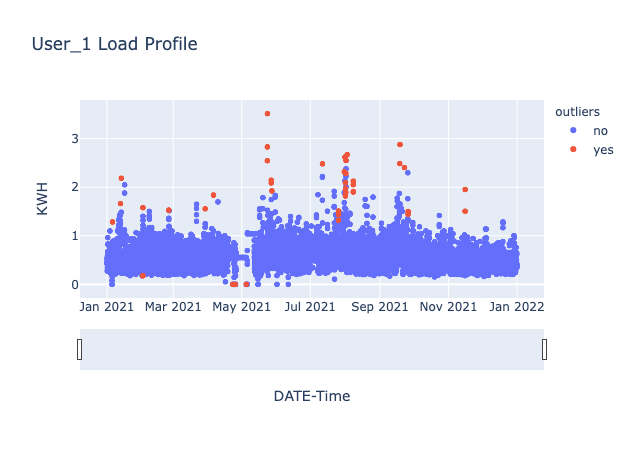

In [29]:
fig = px.scatter(df_final_user_1, x='DATE-Time', y='KWH', color='outliers', hover_data=['weekday','hour','KWH_avg'], title='User_1 Load Profile')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [30]:
score = model.decision_function(data)
score

array([0.12610042, 0.13915994, 0.15027785, ..., 0.14923155, 0.13075282,
       0.07554308])

(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   3.,
          2.,   0.,   3.,   9.,   5.,   6.,   9.,  11.,  11.,  10.,  17.,
         11.,  15.,  20.,  34.,  31.,  37.,  37.,  48.,  58.,  55.,  89.,
         79., 121., 144., 210., 276., 323., 411., 472., 450., 621., 743.,
        977., 913., 923., 908., 562., 102.]),
 array([-0.12942439, -0.12244041, -0.11545643, -0.10847246, -0.10148848,
        -0.0945045 , -0.08752052, -0.08053655, -0.07355257, -0.06656859,
        -0.05958462, -0.05260064, -0.04561666, -0.03863268, -0.03164871,
        -0.02466473, -0.01768075, -0.01069678, -0.0037128 ,  0.00327118,
         0.01025516,  0.01723913,  0.02422311,  0.03120709,  0.03819106,
         0.04517504,  0.05215902,  0.059143  ,  0.06612697,  0.07311095,
         0.08009493,  0.08707891,  0.09406288,  0.10104686,  0.10803084,
         0.11501481,  0.12199879,  0.12898277,  0.13596675,  0.14295072,
         0.1499347 ,  0.15691868,  0.16390265,  0.17088663,  0.17787061,
 

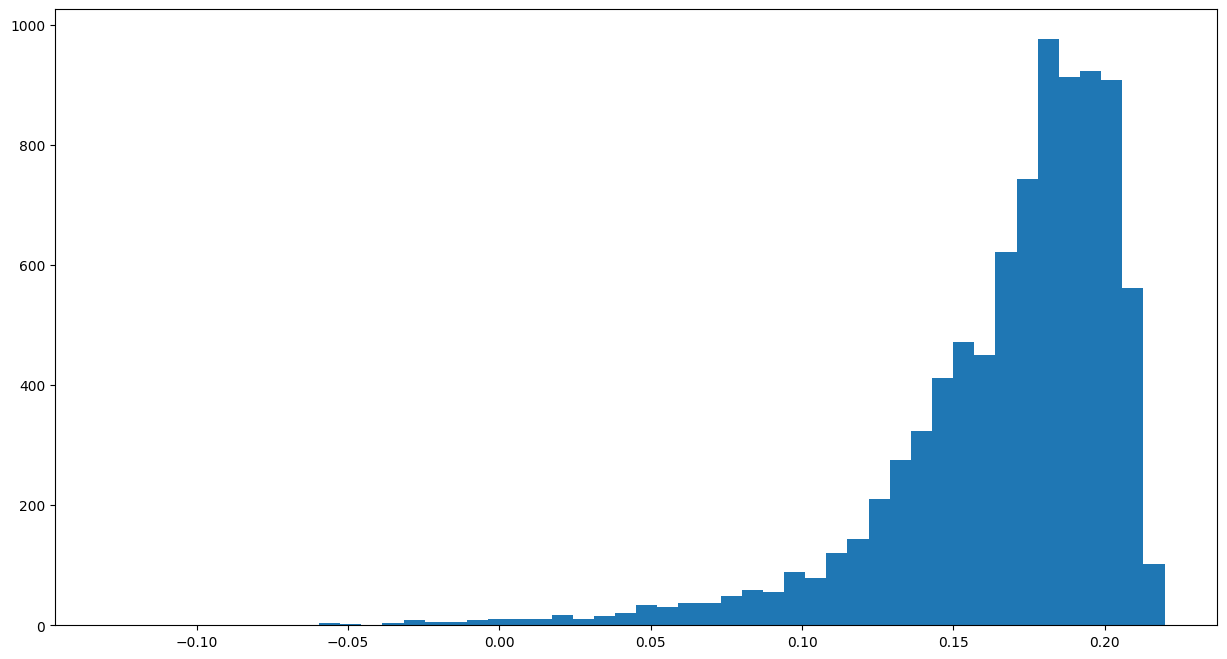

In [31]:
plt.hist(score, bins=50)

In [32]:
df_final_user_1['scores'] = score
df_final_user_1

DATE-Time      KWH  hour weekday   KWH_avg  day outliers  \
0    2021-01-01 00:00:00  0.52400     0  Friday  0.737819    4       no   
1    2021-01-01 01:00:00  0.45825     1  Friday  0.693146    4       no   
2    2021-01-01 02:00:00  0.43250     2  Friday  0.638575    4       no   
3    2021-01-01 03:00:00  0.44625     3  Friday  0.601377    4       no   
4    2021-01-01 04:00:00  0.45500     4  Friday  0.604547    4       no   
...                  ...      ...   ...     ...       ...  ...      ...   
8755 2021-12-31 19:00:00  0.41700    19  Friday  0.694726    4       no   
8756 2021-12-31 20:00:00  0.39275    20  Friday  0.655274    4       no   
8757 2021-12-31 21:00:00  0.40200    21  Friday  0.694382    4       no   
8758 2021-12-31 22:00:00  0.40000    22  Friday  0.756764    4       no   
8759 2021-12-31 23:00:00  0.36000    23  Friday  0.756802    4       no   

        scores  
0     0.126100  
1     0.139160  
2     0.150278  
3     0.177984  
4     0.187675  
...        ...  
8755  0.183966  
8756  0.163828  
8757  0.149232  
8758  0.130753  
8759  0.075543  

[8760 rows x 8 columns]

In [33]:
print("The anomaly events: ", len(df_final_user_1.query('scores<-0.02')))
df_final_user_1.query('scores<-0.02')

The anomaly events:  24


DATE-Time       KWH  hour    weekday   KWH_avg  day outliers  \
289  2021-01-13 01:00:00  1.663250     1  Wednesday  0.708038    2      yes   
307  2021-01-13 19:00:00  2.185000    19  Wednesday  0.799957    2      yes   
767  2021-02-01 23:00:00  0.178000    23     Monday  0.769317    0      yes   
768  2021-02-02 00:00:00  1.578667     0    Tuesday  0.761188    1      yes   
2097 2021-03-29 09:00:00  1.555500     9     Monday  0.561933    0      yes   
2688 2021-04-23 00:00:00  0.000000     0     Friday  0.737819    4      yes   
2976 2021-05-05 00:00:00  0.000000     0  Wednesday  0.753896    2      yes   
3425 2021-05-23 17:00:00  2.545750    17     Sunday  0.752644    6      yes   
3426 2021-05-23 18:00:00  2.830750    18     Sunday  0.839260    6      yes   
3427 2021-05-23 19:00:00  3.515250    19     Sunday  0.878928    6      yes   
3508 2021-05-27 04:00:00  2.145250     4   Thursday  0.688317    3      yes   
3509 2021-05-27 05:00:00  2.088500     5   Thursday  0.727058    3      yes   
4944 2021-07-26 00:00:00  1.321750     0     Monday  0.730441    0      yes   
4945 2021-07-26 01:00:00  1.508000     1     Monday  0.706423    0      yes   
5069 2021-07-31 05:00:00  2.319250     5   Saturday  0.672947    5      yes   
5083 2021-07-31 19:00:00  2.620250    19   Saturday  0.796654    5      yes   
5103 2021-08-01 15:00:00  2.283250    15     Sunday  0.648702    6      yes   
5107 2021-08-01 19:00:00  2.550750    19     Sunday  0.878928    6      yes   
5131 2021-08-02 19:00:00  2.670250    19     Monday  0.728010    0      yes   
6253 2021-09-18 13:00:00  2.487000    13   Saturday  0.528312    5      yes   
6259 2021-09-18 19:00:00  2.878250    19   Saturday  0.796654    5      yes   
6355 2021-09-22 19:00:00  2.404750    19  Wednesday  0.799957    2      yes   
6432 2021-09-26 00:00:00  1.445750     0     Sunday  0.733639    6      yes   
7651 2021-11-15 19:00:00  1.952750    19     Monday  0.728010    0      yes   

        scores  
289  -0.024983  
307  -0.021183  
767  -0.025244  
768  -0.052234  
2097 -0.027894  
2688 -0.024679  
2976 -0.026818  
3425 -0.029235  
3426 -0.074943  
3427 -0.129424  
3508 -0.046051  
3509 -0.022795  
4944 -0.025743  
4945 -0.036194  
5069 -0.053831  
5083 -0.034987  
5103 -0.025349  
5107 -0.021129  
5131 -0.121602  
6253 -0.058618  
6259 -0.073117  
6355 -0.055440  
6432 -0.024743  
7651 -0.036647

In [34]:
df_final_user_1['outliers_new'] = pd.Series(df_final_user_1['scores'] <= -0.02).apply(lambda x: 'yes' if (x == True) else 'no' )
df_final_user_1

DATE-Time      KWH  hour weekday   KWH_avg  day outliers  \
0    2021-01-01 00:00:00  0.52400     0  Friday  0.737819    4       no   
1    2021-01-01 01:00:00  0.45825     1  Friday  0.693146    4       no   
2    2021-01-01 02:00:00  0.43250     2  Friday  0.638575    4       no   
3    2021-01-01 03:00:00  0.44625     3  Friday  0.601377    4       no   
4    2021-01-01 04:00:00  0.45500     4  Friday  0.604547    4       no   
...                  ...      ...   ...     ...       ...  ...      ...   
8755 2021-12-31 19:00:00  0.41700    19  Friday  0.694726    4       no   
8756 2021-12-31 20:00:00  0.39275    20  Friday  0.655274    4       no   
8757 2021-12-31 21:00:00  0.40200    21  Friday  0.694382    4       no   
8758 2021-12-31 22:00:00  0.40000    22  Friday  0.756764    4       no   
8759 2021-12-31 23:00:00  0.36000    23  Friday  0.756802    4       no   

        scores outliers_new  
0     0.126100           no  
1     0.139160           no  
2     0.150278           no  
3     0.177984           no  
4     0.187675           no  
...        ...          ...  
8755  0.183966           no  
8756  0.163828           no  
8757  0.149232           no  
8758  0.130753           no  
8759  0.075543           no  

[8760 rows x 9 columns]

In [35]:
print("The anomaly events: ", len(df_final_user_1.query('outliers_new == "yes"')))
df_final_user_1.query('outliers_new == "yes"')

The anomaly events:  24


DATE-Time       KWH  hour    weekday   KWH_avg  day outliers  \
289  2021-01-13 01:00:00  1.663250     1  Wednesday  0.708038    2      yes   
307  2021-01-13 19:00:00  2.185000    19  Wednesday  0.799957    2      yes   
767  2021-02-01 23:00:00  0.178000    23     Monday  0.769317    0      yes   
768  2021-02-02 00:00:00  1.578667     0    Tuesday  0.761188    1      yes   
2097 2021-03-29 09:00:00  1.555500     9     Monday  0.561933    0      yes   
2688 2021-04-23 00:00:00  0.000000     0     Friday  0.737819    4      yes   
2976 2021-05-05 00:00:00  0.000000     0  Wednesday  0.753896    2      yes   
3425 2021-05-23 17:00:00  2.545750    17     Sunday  0.752644    6      yes   
3426 2021-05-23 18:00:00  2.830750    18     Sunday  0.839260    6      yes   
3427 2021-05-23 19:00:00  3.515250    19     Sunday  0.878928    6      yes   
3508 2021-05-27 04:00:00  2.145250     4   Thursday  0.688317    3      yes   
3509 2021-05-27 05:00:00  2.088500     5   Thursday  0.727058    3      yes   
4944 2021-07-26 00:00:00  1.321750     0     Monday  0.730441    0      yes   
4945 2021-07-26 01:00:00  1.508000     1     Monday  0.706423    0      yes   
5069 2021-07-31 05:00:00  2.319250     5   Saturday  0.672947    5      yes   
5083 2021-07-31 19:00:00  2.620250    19   Saturday  0.796654    5      yes   
5103 2021-08-01 15:00:00  2.283250    15     Sunday  0.648702    6      yes   
5107 2021-08-01 19:00:00  2.550750    19     Sunday  0.878928    6      yes   
5131 2021-08-02 19:00:00  2.670250    19     Monday  0.728010    0      yes   
6253 2021-09-18 13:00:00  2.487000    13   Saturday  0.528312    5      yes   
6259 2021-09-18 19:00:00  2.878250    19   Saturday  0.796654    5      yes   
6355 2021-09-22 19:00:00  2.404750    19  Wednesday  0.799957    2      yes   
6432 2021-09-26 00:00:00  1.445750     0     Sunday  0.733639    6      yes   
7651 2021-11-15 19:00:00  1.952750    19     Monday  0.728010    0      yes   

        scores outliers_new  
289  -0.024983          yes  
307  -0.021183          yes  
767  -0.025244          yes  
768  -0.052234          yes  
2097 -0.027894          yes  
2688 -0.024679          yes  
2976 -0.026818          yes  
3425 -0.029235          yes  
3426 -0.074943          yes  
3427 -0.129424          yes  
3508 -0.046051          yes  
3509 -0.022795          yes  
4944 -0.025743          yes  
4945 -0.036194          yes  
5069 -0.053831          yes  
5083 -0.034987          yes  
5103 -0.025349          yes  
5107 -0.021129          yes  
5131 -0.121602          yes  
6253 -0.058618          yes  
6259 -0.073117          yes  
6355 -0.055440          yes  
6432 -0.024743          yes  
7651 -0.036647          yes

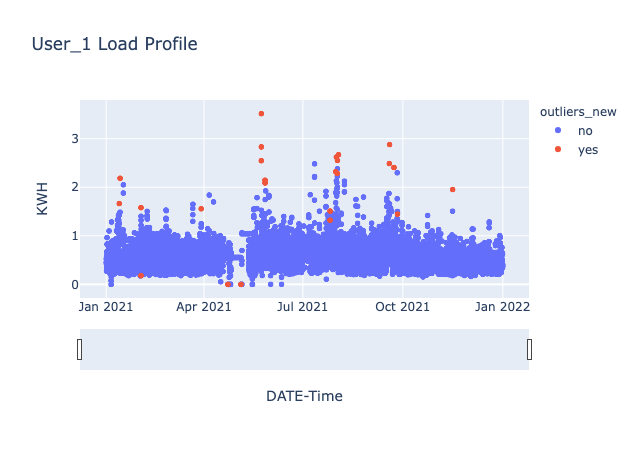

In [37]:
fig = px.scatter(df_final_user_1, x='DATE-Time', y='KWH', color='outliers_new', hover_data=['weekday','hour','KWH_avg'], title='User_1 Load Profile')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()